In [1]:
!pip install -q snscrape==0.3.4

In [2]:
import os
import pandas as pd
from datetime import date


#searches if there are numbers in the string
def has_numbers(str):
  return any(char.isdigit() for char in str)


#finds the number in 'str' before thw word 'wrd' (returns -1 if not found)
def findNumBef(str, wrd):
  res = -1
  pos = str.find(wrd)
  num = ''
  for i in range(pos-2,-1,-1): #From the beginning of the word, it loops back for all numeric characters
    if str[i].isnumeric():
      num = str[i] + num
    else:
      break

  if num.isnumeric():
    res = int(num)

  return res


#finds the text inside a tweet
def tweet_text(row):
  res = ""

  if type(row) is tuple:
    res = row
        
    while(type(res) is tuple):
      res = res[0]
        
  return str(res)

In [3]:
today = date.today()
today = str(today)
today_y = int(today.split('-')[0])

year = 2009

dates = []  #list with all possible dates

#loop to save all possible dates
for i in range(year,today_y):
  if i==today_y:
    dates.append(today)
  else:
    for j in range(1,12,3):
      dates.append("{}-{:02d}-01".format(i,j))

print(dates)

['2009-01-01', '2009-04-01', '2009-07-01', '2009-10-01', '2010-01-01', '2010-04-01', '2010-07-01', '2010-10-01', '2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01', '2012-01-01', '2012-04-01', '2012-07-01', '2012-10-01', '2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01', '2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01', '2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01', '2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01', '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01', '2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01', '2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01', '2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01']


In [4]:
search_term = 'millones muertos comunismo'
max_results = 100

deaths = [[]] #list of lists with all numbers grouped by date

#for each date we scrape twitter searching "muertos" and "comunismo"
for i,elem in enumerate(dates):
  if i>0:
    deaths.append([])

    #twitter scrapping with snscrape
    print(f'{dates[i-1]} to {elem}')
    extracted_tweets = "snscrape --format '{content!r}'"+ f" --max-results {max_results} --since {dates[i-1]} twitter-search '{search_term} until:{elem}' > extracted-tweets.txt"
    os.system(extracted_tweets)

    #tweet extraction from file
    if os.stat("extracted-tweets.txt").st_size == 0:
      print('No Tweets found')
    else:
      df = pd.read_csv('extracted-tweets.txt', names=['content'])

      for row in df['content'].iteritems():

        if not type(row) is tuple:
          break

        tweet = tweet_text(row)

        #we search the keyword "millones" and save the number before it
        if tweet.find('millones')!=-1 and has_numbers(tweet):
          num = findNumBef(tweet,'millones')
          if num>9 and num**(1/3)<10:
            deaths[i-1].append(num)

2009-01-01 to 2009-04-01
No Tweets found
2009-04-01 to 2009-07-01
No Tweets found
2009-07-01 to 2009-10-01
No Tweets found
2009-10-01 to 2010-01-01
2010-01-01 to 2010-04-01
2010-04-01 to 2010-07-01
2010-07-01 to 2010-10-01
2010-10-01 to 2011-01-01
2011-01-01 to 2011-04-01
2011-04-01 to 2011-07-01
2011-07-01 to 2011-10-01
2011-10-01 to 2012-01-01
2012-01-01 to 2012-04-01
2012-04-01 to 2012-07-01
2012-07-01 to 2012-10-01
2012-10-01 to 2013-01-01
2013-01-01 to 2013-04-01
2013-04-01 to 2013-07-01
2013-07-01 to 2013-10-01
2013-10-01 to 2014-01-01
2014-01-01 to 2014-04-01
2014-04-01 to 2014-07-01
2014-07-01 to 2014-10-01
2014-10-01 to 2015-01-01
2015-01-01 to 2015-04-01
2015-04-01 to 2015-07-01
2015-07-01 to 2015-10-01
2015-10-01 to 2016-01-01
2016-01-01 to 2016-04-01
2016-04-01 to 2016-07-01
2016-07-01 to 2016-10-01
2016-10-01 to 2017-01-01
2017-01-01 to 2017-04-01
2017-04-01 to 2017-07-01
2017-07-01 to 2017-10-01
2017-10-01 to 2018-01-01
2018-01-01 to 2018-04-01
2018-04-01 to 2018-07-01
20

Text(0, 0.5, 'Número de muertos\n')

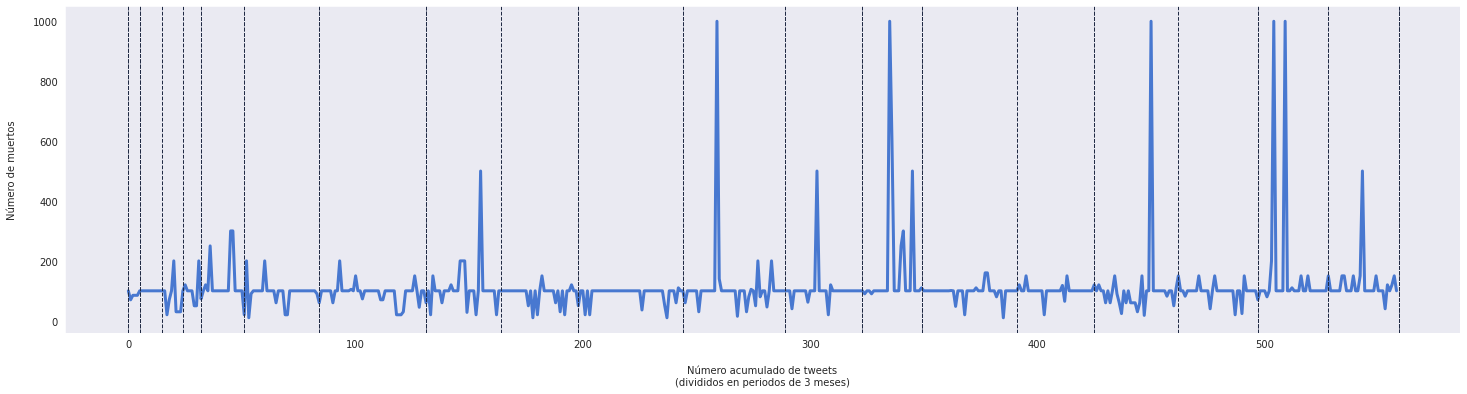

In [6]:
#plot with all deaths

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#sns style
sns.set_style("dark")
blue, = sns.color_palette("muted", 1)

xx = [] #xaxis
yy = [] #yaxis

year = [] #list of date boundaries in the tweet list
year_count = 0 #aux variable for counting years

#loop to format the yaxis and find all date boundaries
for i in deaths:
  for j in i:
    yy.append(j)
    year_count += 1
  year.append(year_count)

#loop to format the xaxis
for i in range(0,len(yy)):
  xx.append(i)

#polyfit of the graph
p = np.polyfit(range(len(xx)),yy,15);
pp = np.polyval(p,range(len(xx)));

#figure size
plt.rcParams['figure.figsize'] = [25, 6]

#plot
plt.plot(xx, yy, color=blue, lw=3)  #main plot
#plt.plot(xx, pp, 'r', lw=1)  #polyfit plot
for i in year:
  plt.axvline(x=i, lw=1, color='#202A44', linestyle='--') #date boundaries plot

#labels
plt.xlabel("\nNúmero acumulado de tweets\n(divididos en periodos de 3 meses)")
plt.ylabel("Número de muertos\n")

Text(0, 0.5, 'Media de muertos\n')

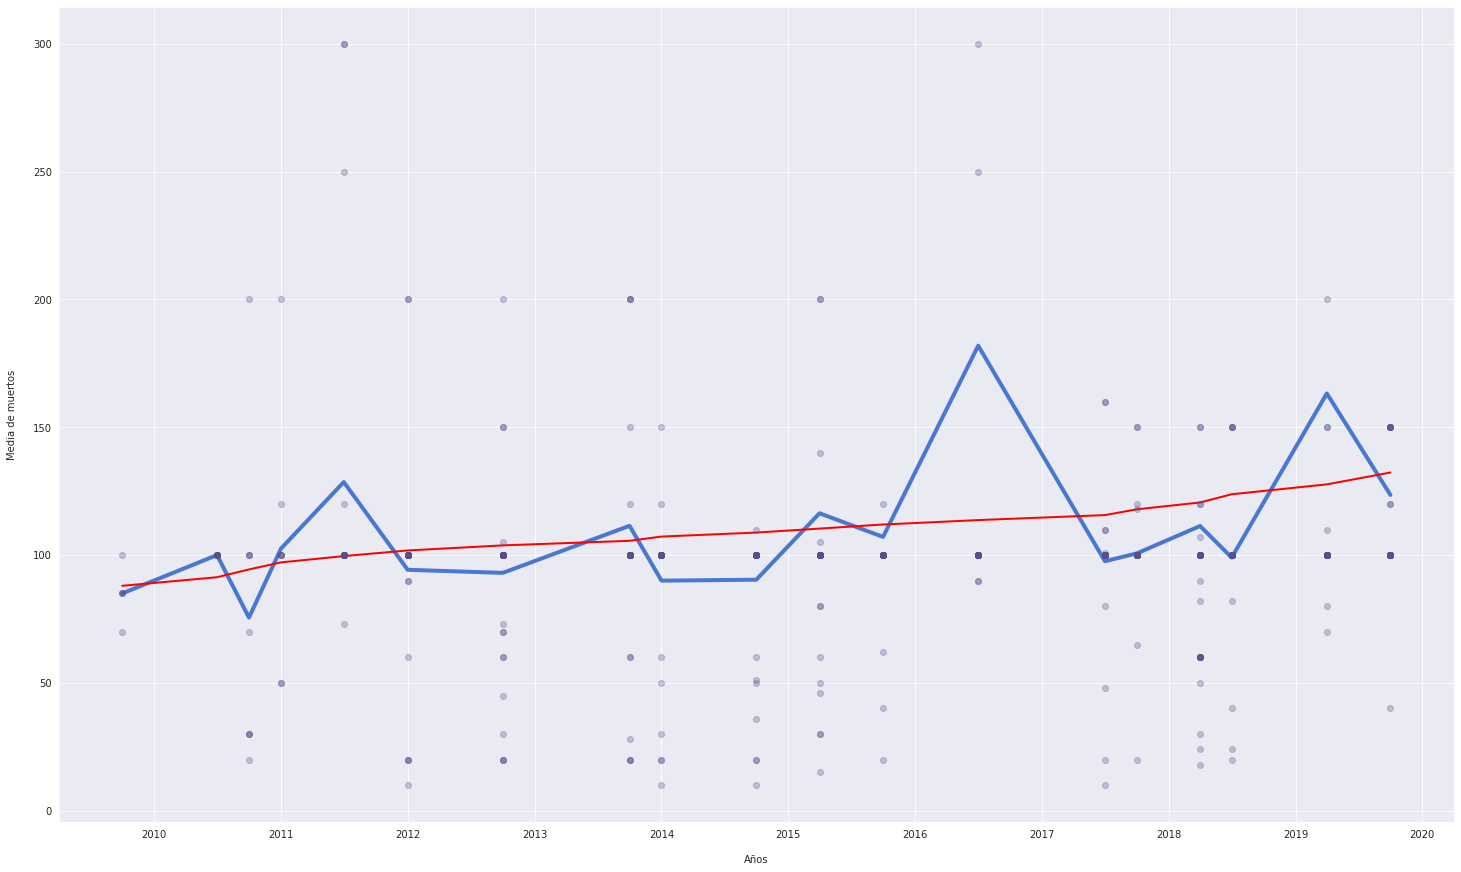

In [7]:
#plot with average deaths per date

import datetime
import numpy as np

#sns style
sns.set_style("darkgrid")
blue, = sns.color_palette("muted", 1)

#adds date format to datelist (from string format)
f_date = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]

avg_deaths = [] #avg deaths in total (0 when not found)
xx_avg = [] #xaxis for avg deaths
yy_avg = [] #yaxis for avg deaths
xx_err = [] #xaxis for error (years without info)
yy_err = [] #yaxis for error
xx_acum = []  #xaxis for all scattered points
yy_acum = []  #yaxis for all scattered points

#loop to get the average deaths
for i in deaths:
  if len(i)==0:
    avg_deaths.append(0)
  else:
    avg_deaths.append(sum(i)/len(i))

#loop to format xx_avg, yy_avg, xx_err and yy_err
for count,val in enumerate(avg_deaths):
  if val != 0:  #if there is no info, it goes to err; else it goes to avg
    xx_avg.append(datetime.datetime.strptime(dates[count],"%Y-%m-%d").date())
    yy_avg.append(val)
  else:
    xx_err.append(datetime.datetime.strptime(dates[count],"%Y-%m-%d").date())
    yy_err.append(val)

#loop to format xx_acum and yy_acum
for count,i in enumerate(deaths):
  for j in i:
    if j<400: #removes extreme data to maintain the scale of the plot
      xx_acum.append(datetime.datetime.strptime(dates[count],"%Y-%m-%d").date())
      yy_acum.append(j)

#polyfot of avg
p = np.polyfit(range(len(xx_avg)),yy_avg,4);
p_avg = np.polyval(p,range(len(xx_avg)));

#figure size
plt.rcParams['figure.figsize'] = [25, 15]

#plot
plt.plot(xx_avg, yy_avg, color=blue, lw=4)  #main plot
plt.plot(xx_avg, p_avg, color='r', lw=2)  #polyfit plot
plt.plot(xx_acum, yy_acum, 'o', color='#58508d', lw=3, alpha=0.3) #scattered points plot
#for i in xx_err[3:len(xx_err)-4]:
#  plt.axvline(x=i, lw=12, alpha=0.2, color=blue) #error plot

#labels
plt.xlabel("\nAños")
plt.ylabel("Media de muertos\n")

Text(0, 0.5, 'Frequencia de aparición\n')

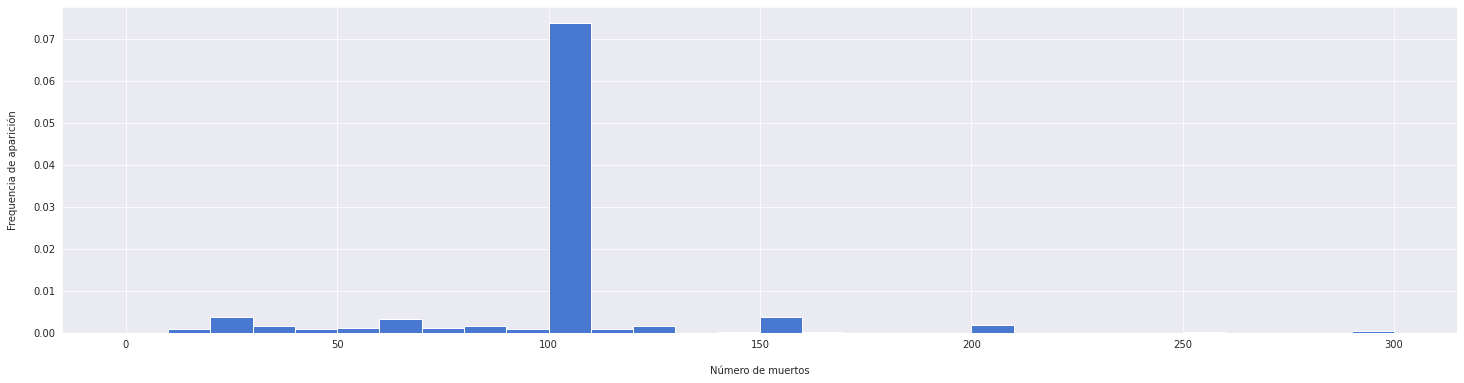

In [8]:
#frequency graph

#sns style
sns.set_style("darkgrid")
blue, = sns.color_palette("muted", 1)

#figure size
plt.rcParams['figure.figsize'] = [25, 6]

#plot
plt.hist(yy, color=blue, density=True, bins=range(0,310,10))

#labels
plt.xlabel("\nNúmero de muertos")
plt.ylabel("Frequencia de aparición\n")

Text(0, 0.5, 'Número de tweets\n')

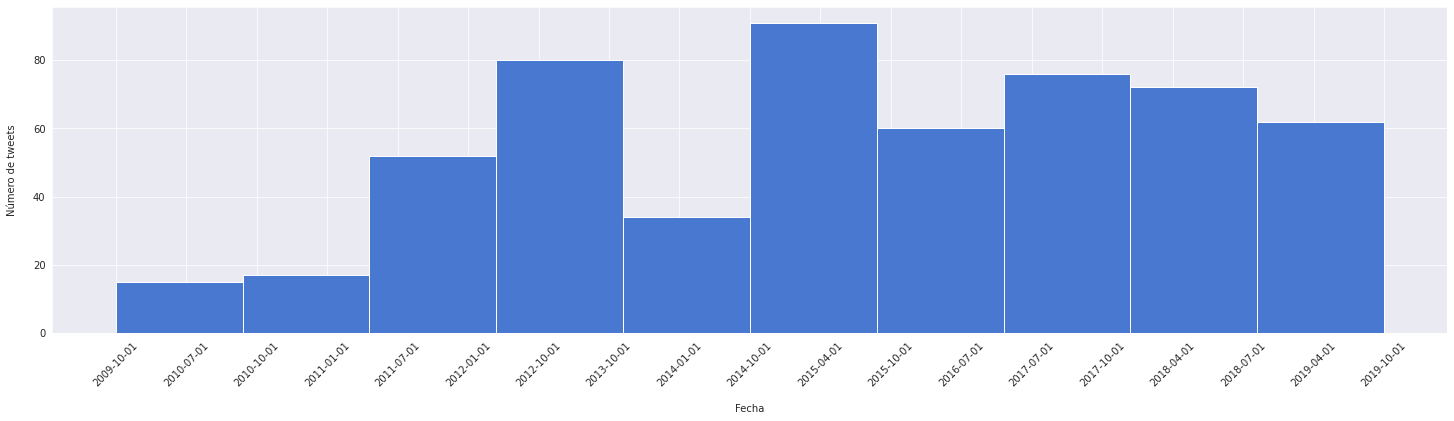

In [8]:
#number of tweets per date

import matplotlib.dates as mdates

#sns style
sns.set_style("darkgrid")
blue, = sns.color_palette("muted", 1)

xx_freq = []  #xaxis for the frequency (dates)
dates_freq = [] #frequency of dates

#we add the frequency, changing date for each list in deaths
for count,i in enumerate(deaths):
  for j in i:
    xx_freq.append(dates[count])

#figure size
plt.rcParams['figure.figsize'] = [25, 6]

#plot
plt.hist(xx_freq, color=blue)
plt.xticks(rotation = 45) #we rotate the names in xaxis

#labels
plt.xlabel("\nFecha")
plt.ylabel("Número de tweets\n")